In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import matplotlib as mpl

In [100]:
#load the first sheet of aggregationV4
df12=pd.read_csv("../AggregationV4.csv")
df12=df12[:].copy()

# df13=pd.read_csv("../AggregationV4_13CO.csv")
# df13=df13[:].copy()

## remake Fig 2, scaling relation

In [101]:
plt.rcParams["text.usetex"]=True
plt.rcParams["axes.labelsize"]=20
plt.rcParams["ytick.labelsize"]=16
plt.rcParams["xtick.labelsize"]=16


### ordinary linear regression

In [102]:
def fit_line_ord_lin_reg(X,Y):
    X=np.array(X)
    Y=np.array(Y)

    valid_filt=(X==X)&(Y==Y)
    Y=np.log10(Y[valid_filt])

    X=np.log10(X[valid_filt])
    X=np.array([np.ones_like(X),X]).T
    # print(X)

    beta=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    
    err=Y-np.dot(X,beta)

    s_beta1=np.sqrt((np.sum(err**2)/(len(err)-2))/np.sum((X[:,1]-np.mean(X[:,1]))**2))
    #     print("sigma beta1=",s_beta1)

    s_beta0=s_beta1*np.sqrt(np.sum(X[:,1]**2)/len(err))
#     print("sigma beta0=",s_beta0)
    return beta, s_beta0, s_beta1

### retain only necessary fields, there is an outlier to be cut later

In [112]:
df12_cut=df12[["SIGV_KMS","RAD3D_PC","CLOUDNUM","VIRPARAM","SURFDENS","MLUM_MSUN","MVIR_MSUN",\
              "SF_stage"]]

[-0.00801128  0.43331149] 0.05208137154496467 0.046239563101516785


Text(0, 0.5, '$\\sigma_v ~\\rm~[km~s^{-1}]$')

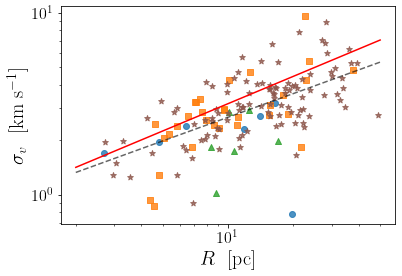

In [113]:
X=[]
Y=[]

clist=["tab:blue","tab:green","tab:orange","tab:brown"]
slist=['o','^','s','*']
for i,stage in enumerate(["Dark","Embedded SF","Early SF","Late SF"]):
    tmpX=np.array(df12_cut["RAD3D_PC"][df12_cut["SF_stage"]==stage])
    tmpY=np.array(df12_cut["SIGV_KMS"][df12_cut["SF_stage"]==stage])
    X+=list(tmpX)
    Y+=list(tmpY)
    plt.scatter(tmpX,tmpY,c=clist[i],marker=slist[i],alpha=0.8)

beta, s_beta0, s_beta1 = fit_line_ord_lin_reg(X,Y)
print(beta,s_beta0, s_beta1)
dummyX=np.logspace(0.3,1.7)
dummyY=10**beta[0]*dummyX**beta[1]
plt.plot(dummyX,dummyY,c="k",ls="--",alpha=0.6)
plt.plot(dummyX,dummyX**0.5,c='r')
plt.loglog()
plt.xlabel(r"$R ~\rm~[pc]$")
plt.ylabel(r"$\sigma_v ~\rm~[km~s^{-1}]$")

### $M_{CO}$ vs $M_{vir}$

Text(0, 0.5, '$M_{\\rm vir}~\\rm~[M_\\odot]$')

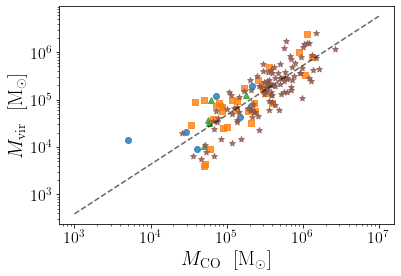

In [114]:
X=[]
Y=[]

clist=["tab:blue","tab:green","tab:orange","tab:brown"]
slist=['o','^','s','*']
for i,stage in enumerate(["Dark","Embedded SF","Early SF","Late SF"]):
    tmpX=np.array(df12_cut["MLUM_MSUN"][df12_cut["SF_stage"]==stage])
    tmpY=np.array(df12_cut["MVIR_MSUN"][df12_cut["SF_stage"]==stage])
    X+=list(tmpX)
    Y+=list(tmpY)
    plt.scatter(tmpX,tmpY,c=clist[i],marker=slist[i],alpha=0.8)

beta, s_beta0, s_beta1 = fit_line_ord_lin_reg(X,Y)
dummyX=np.logspace(3,7)
dummyY=10**beta[0]*dummyX**beta[1]
plt.plot(dummyX,dummyY,c="k",ls="--",alpha=0.6)
plt.loglog()
plt.xlabel(r"$M_{\rm CO}~\rm~[M_\odot]$")
plt.ylabel(r"$M_{\rm vir}~\rm~[M_\odot]$")


Text(0, 0.5, '$M_{\\rm CO}~\\rm~[M_\\odot]$')

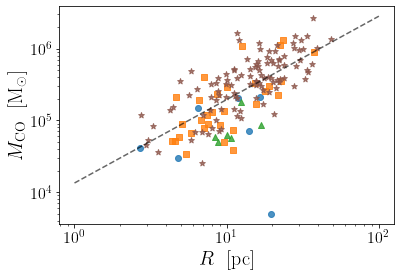

In [115]:
X=[]
Y=[]

clist=["tab:blue","tab:green","tab:orange","tab:brown"]
slist=['o','^','s','*']
for i,stage in enumerate(["Dark","Embedded SF","Early SF","Late SF"]):
    tmpX=np.array(df12_cut["RAD3D_PC"][df12_cut["SF_stage"]==stage])
    tmpY=np.array(df12_cut["MLUM_MSUN"][df12_cut["SF_stage"]==stage])
    X+=list(tmpX)
    Y+=list(tmpY)
    plt.scatter(tmpX,tmpY,c=clist[i],marker=slist[i],alpha=0.8)

beta, s_beta0, s_beta1 = fit_line_ord_lin_reg(X,Y)
dummyX=np.logspace(0,2)
dummyY=10**beta[0]*dummyX**beta[1]
plt.plot(dummyX,dummyY,c="k",ls="--",alpha=0.6)
plt.loglog()

plt.loglog()
plt.xlabel(r"$R ~\rm~[pc]$")
plt.ylabel(r"$M_{\rm CO}~\rm~[M_\odot]$")


### sig^2/R vs. surfDen

76 76
55 55
96 96
217 217


Text(0, 0.5, '$\\sigma_v/R ~\\rm~[km^2 s^{-2} pc^{-1}]$')

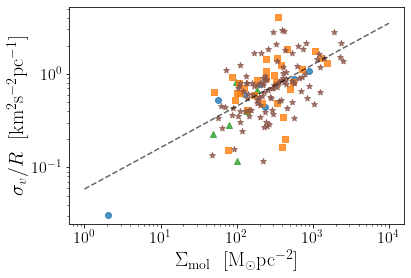

In [116]:
X=[]
Y=[]

clist=["tab:blue","tab:green","tab:orange","tab:brown"]
slist=['o','^','s','*']
for i,stage in enumerate(["Dark","Embedded SF","Early SF","Late SF"]):
    tmpY=np.array(df12_cut["SIGV_KMS"][df12_cut["SF_stage"]==stage]**2/df12_cut["RAD3D_PC"][df12_cut["SF_stage"]==stage])
    tmpX=np.array(df12_cut["SURFDENS"][df12_cut["SF_stage"]==stage])
    print(len(tmpX),len(tmpY))
    X+=list(tmpX)
    Y+=list(tmpY)
    plt.scatter(tmpX,tmpY,c=clist[i],marker=slist[i],alpha=0.8)


beta, s_beta0, s_beta1 = fit_line_ord_lin_reg(X,Y)

dummyX=np.logspace(0,4)
dummyY=10**beta[0]*dummyX**beta[1]
plt.plot(dummyX,dummyY,c="k",ls="--",alpha=0.6)

plt.loglog()
plt.xlabel(r"$\Sigma_{\rm mol}~\rm~[M_\odot pc^{-2}]$")

plt.ylabel(r"$\sigma_v/R ~\rm~[km^2 s^{-2} pc^{-1}]$")


# #232 is an outlier in all the relations

In [117]:
df12_cut["CLOUDNUM"][df12_cut["SIGV_KMS"]**2/df12_cut["RAD3D_PC"]<0.1]

230    232
Name: CLOUDNUM, dtype: int64

In [118]:
df12_cut["CLOUDNUM"][(df12_cut["MLUM_MSUN"]<1E4)&(df12_cut["RAD3D_PC"]==df12_cut["RAD3D_PC"])]

230    232
Name: CLOUDNUM, dtype: int64

In [119]:
df12_cut["CLOUDNUM"][df12_cut["SURFDENS"]<10]

230    232
Name: CLOUDNUM, dtype: int64

In [120]:
df12_cut=df12_cut[df12_cut["CLOUDNUM"]!=232]

[-0.01678136  0.4453275 ] 0.04895008198353385 0.04350522473361704


Text(0, 0.5, '$\\sigma_v ~\\rm~[km~s^{-1}]$')

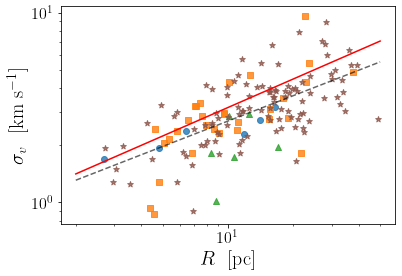

In [132]:
X=[]
Y=[]

clist=["tab:blue","tab:green","tab:orange","tab:brown"]
slist=['o','^','s','*']
for i,stage in enumerate(["Dark","Embedded SF","Early SF","Late SF"]):
    tmpX=np.array(df12_cut["RAD3D_PC"][df12_cut["SF_stage"]==stage])
    tmpY=np.array(df12_cut["SIGV_KMS"][df12_cut["SF_stage"]==stage])
    X+=list(tmpX)
    Y+=list(tmpY)
    plt.scatter(tmpX,tmpY,c=clist[i],marker=slist[i],alpha=0.8)

beta, s_beta0, s_beta1 = fit_line_ord_lin_reg(X,Y)
print(beta,s_beta0, s_beta1)
dummyX=np.logspace(0.3,1.7)
dummyY=10**beta[0]*dummyX**beta[1]
plt.plot(dummyX,dummyY,c="k",ls="--",alpha=0.6)
plt.plot(dummyX,dummyX**0.5,c='r')
plt.loglog()
plt.xlabel(r"$R ~\rm~[pc]$")
plt.ylabel(r"$\sigma_v ~\rm~[km~s^{-1}]$")

[-0.80072959  1.09005031] 0.3306538943022391 0.060917116452026424


Text(0, 0.5, '$M_{\\rm vir}~\\rm~[M_\\odot]$')

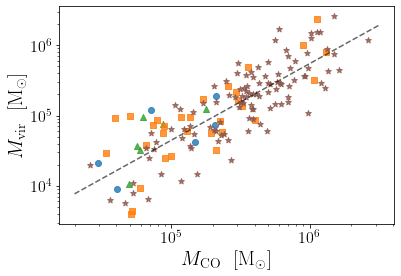

In [133]:
X=[]
Y=[]

clist=["tab:blue","tab:green","tab:orange","tab:brown"]
slist=['o','^','s','*']
for i,stage in enumerate(["Dark","Embedded SF","Early SF","Late SF"]):
    tmpX=np.array(df12_cut["MLUM_MSUN"][df12_cut["SF_stage"]==stage])
    tmpY=np.array(df12_cut["MVIR_MSUN"][df12_cut["SF_stage"]==stage])
    X+=list(tmpX)
    Y+=list(tmpY)
    plt.scatter(tmpX,tmpY,c=clist[i],marker=slist[i],alpha=0.8)

beta, s_beta0, s_beta1 = fit_line_ord_lin_reg(X,Y)
print(beta, s_beta0, s_beta1)

dummyX=np.logspace(4.3,6.5)
dummyY=10**beta[0]*dummyX**beta[1]
plt.plot(dummyX,dummyY,c="k",ls="--",alpha=0.6)
plt.loglog()
plt.xlabel(r"$M_{\rm CO}~\rm~[M_\odot]$")
plt.ylabel(r"$M_{\rm vir}~\rm~[M_\odot]$")


[4.10112849 1.19800076] 0.10370112460984358 0.09216615271038138


Text(0, 0.5, '$M_{\\rm CO}~\\rm~[M_\\odot]$')

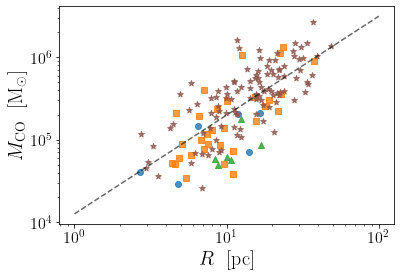

In [134]:
X=[]
Y=[]

clist=["tab:blue","tab:green","tab:orange","tab:brown"]
slist=['o','^','s','*']
for i,stage in enumerate(["Dark","Embedded SF","Early SF","Late SF"]):
    tmpX=np.array(df12_cut["RAD3D_PC"][df12_cut["SF_stage"]==stage])
    tmpY=np.array(df12_cut["MLUM_MSUN"][df12_cut["SF_stage"]==stage])
    X+=list(tmpX)
    Y+=list(tmpY)
    plt.scatter(tmpX,tmpY,c=clist[i],marker=slist[i],alpha=0.8)

beta, s_beta0, s_beta1 = fit_line_ord_lin_reg(X,Y)
print(beta, s_beta0, s_beta1)
dummyX=np.logspace(0,2)
dummyY=10**beta[0]*dummyX**beta[1]
plt.plot(dummyX,dummyY,c="k",ls="--",alpha=0.6)
plt.loglog()

plt.loglog()
plt.xlabel(r"$R ~\rm~[pc]$")
plt.ylabel(r"$M_{\rm CO}~\rm~[M_\odot]$")


75 75
55 55
96 96
217 217


Text(0, 0.5, '$\\sigma_v/R ~\\rm~[km^2 s^{-2} pc^{-1}]$')

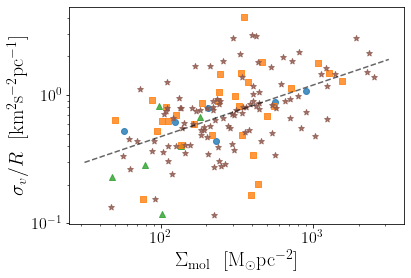

In [135]:
X=[]
Y=[]

clist=["tab:blue","tab:green","tab:orange","tab:brown"]
slist=['o','^','s','*']
for i,stage in enumerate(["Dark","Embedded SF","Early SF","Late SF"]):
    tmpY=np.array(df12_cut["SIGV_KMS"][df12_cut["SF_stage"]==stage]**2/df12_cut["RAD3D_PC"][df12_cut["SF_stage"]==stage])
    tmpX=np.array(df12_cut["SURFDENS"][df12_cut["SF_stage"]==stage])
    print(len(tmpX),len(tmpY))
    X+=list(tmpX)
    Y+=list(tmpY)
    plt.scatter(tmpX,tmpY,c=clist[i],marker=slist[i],alpha=0.8)


beta, s_beta0, s_beta1 = fit_line_ord_lin_reg(X,Y)

dummyX=np.logspace(1.5,3.5)
dummyY=10**beta[0]*dummyX**beta[1]
plt.plot(dummyX,dummyY,c="k",ls="--",alpha=0.6)

plt.loglog()
plt.xlabel(r"$\Sigma_{\rm mol}~\rm~[M_\odot pc^{-2}]$")

plt.ylabel(r"$\sigma_v/R ~\rm~[km^2 s^{-2} pc^{-1}]$")
